<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Statistical_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description:
#### The data at hand contains medical costs of people characterized by certain attributes.
## Domain:
Healthcare
### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Attribute Information:
- age : Age of primary beneficiary
- sex: Insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance.

### Objective:
To dive deep into this data to find some valuable insights.

## Submitted by: Sothing Shimrah

## 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

## 2. Read the data as a data frame

In [ ]:
# Load the insurance Dataset
ins_df = pd.read_csv("insurance.csv")

In [ ]:
#To display the 1st 5 records/lines
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#To display the last 5 records/lines
ins_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Insights:
- Loaded the data and store temporarily in a variable called "ins_df"
- The above functions such head(), tail() will give you rought idea on the content of the data set

## 3. Perform basic Exploratory Data Analysis (EDA)

### Insights of every step are provided after print

### 3. (a). Shape of the data

In [ ]:
# shape property is usually used to get the current shape of an array
ins_df.shape

(1338, 7)

### Insights:
- In this case we have 1338 records and 7 columns in the dataframe


### 3.(b). Data type of each attribute

In [ ]:
# info() function is used to get a concise summary of the dataframe.
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


### Insight: Data Type attributes:
The function provides the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. in this dataframe, we have
- 1338 records
- Column Data types - Age, children are int64, bmi,charges are float64 and sex,smoker,region are objects indicates as Category
- It also tell the how are many records are having non-null in each columns. No null /"NaN" present in this data set.
- Memory usage is 57.6+ KB

### 3.c. Checking the presence of missing values

In [ ]:
# check if there is any Nan/null value in the data set
ins_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [ ]:
ins_df.isna().sum().sum()

0

### Insights:
- We don't have any null values in dataset

### 3. (d). 5 point summary of numerical attributes

In [ ]:
#describe() function is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
# We can also include the category by adding - ins_df.describe(include="all")
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Insight:
#### The five numbers that help describe the center, spread and shape of data are:
- 1) Xsmallest 2) First Quartile (Q1) 3) Median (Q2) 4) Third Quartile (Q 3) 5) Xlargest
- By looking result,the statistics looks reasonable
- Looking at age column, data looks representative of the true age distribution of the adult population
- Very few people have more than 2 children. 75% of the people have 2 or less children
- The claimed amount is higly skewed as most people would require basic medi-care.Seems like the claim increases as age increase

### 3.(e). Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

Text(0.5, 1.0, 'Charges Distribution')

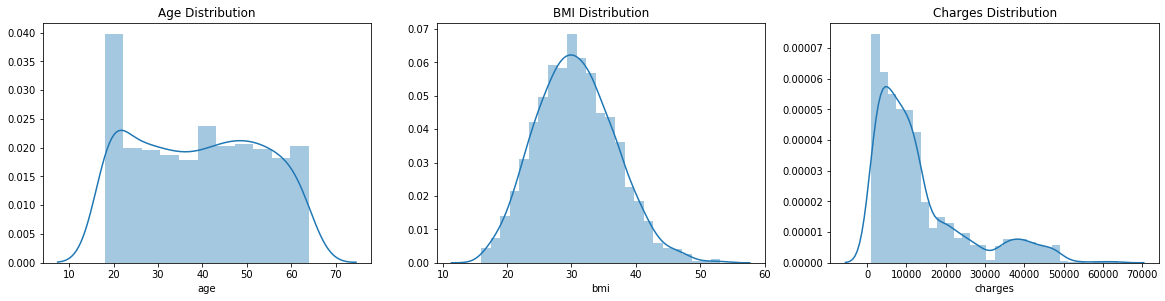

In [ ]:
# To check the distribution let's plot displotplot
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(ins_df["age"])
plt.title("Age Distribution")
plt.subplot(3,3,2)
sns.distplot(ins_df["bmi"])
plt.title("BMI Distribution")
plt.subplot(3,3,3)
sns.distplot(ins_df["charges"])
plt.title("Charges Distribution")

### Insights:
- The age uniformly distributed except at certain point ~ 20
- The bmi show normal distribution - symmetrical
- The distribution for charges decreases as charges increase. this indicates the highly skewed towards right.

### 3.(f).Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [ ]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(ins_df.bmi),stats.skew(ins_df.age),stats.skew(ins_df.charges)]},
                        index=['bmi','age','charges'])
Skewness.T


,bmi,age,charges
Skewness,0.283729,0.05561,1.51418


### Skewness Insight:¶
- Skew of bmi is very less
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed

### 3.(g). Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Text(0.5, 1.0, 'Charges Outlier')

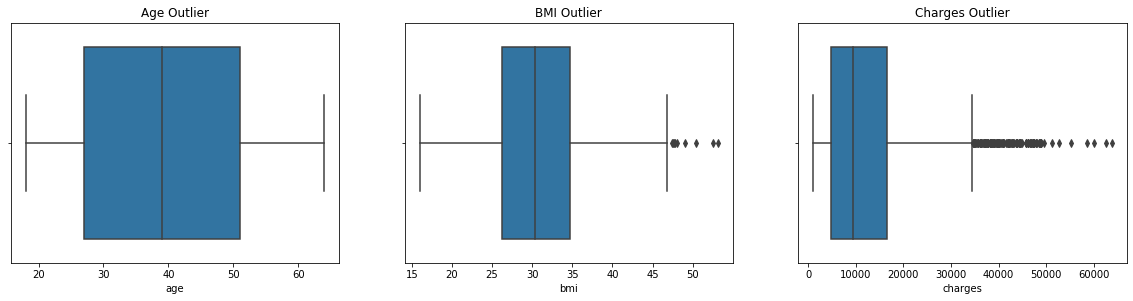

In [ ]:
# to check the outliers let's plot box plot
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(ins_df["age"])
plt.title("Age Outlier")
plt.subplot(3,3,2)
sns.boxplot(ins_df["bmi"])
plt.title("BMI Outlier")
plt.subplot(3,3,3)
sns.boxplot(ins_df["charges"])
plt.title("Charges Outlier")

### Insights:
- We noticed that the age doesn't have any outlier
- bmi has a few extreme values
- charges are highly skewed, there are a lot of extreme values

#### Note: A value is considered an outlier if it more than 1.5 times the interquartile range (IQR) below Q1 or above Q3. The inter quarter range is calculated as IQR = Q3-Q1 and the range between the max and min of 1.5 * IQR is from IQR is called Whisker



### 3. (h). Distribution of categorical columns (include children)

Text(0.5, 1.0, 'Children Distribution')

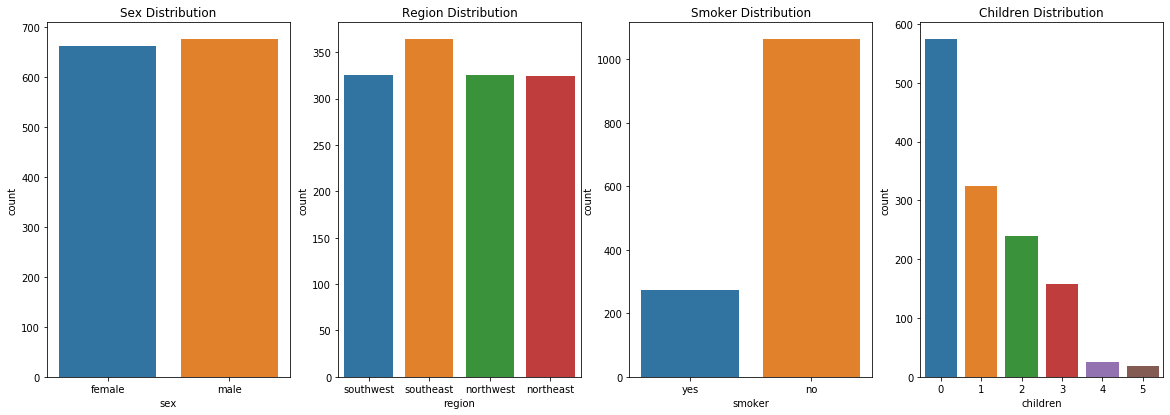

In [ ]:
# plot countplot against the category
plt.figure(figsize=(20,30))
plt.subplot(4,4,1)
sns.countplot(ins_df["sex"])
plt.title("Sex Distribution")
plt.subplot(4,4,2)
sns.countplot(ins_df["region"])
plt.title("Region Distribution")
plt.subplot(4,4,3)
sns.countplot(ins_df["smoker"])
plt.title("Smoker Distribution")
plt.subplot(4,4,4)
sns.countplot(ins_df["children"])
plt.title("Children Distribution")

### Insights:
- The count of male and female are almost the same
- Southeast is showing highest others look similar
- Less smoker compare to non-smoker
- only few has more than 2 children - the count decreases as number of child increases

### 3.(i). Pair plot that includes all the columns of the data frame

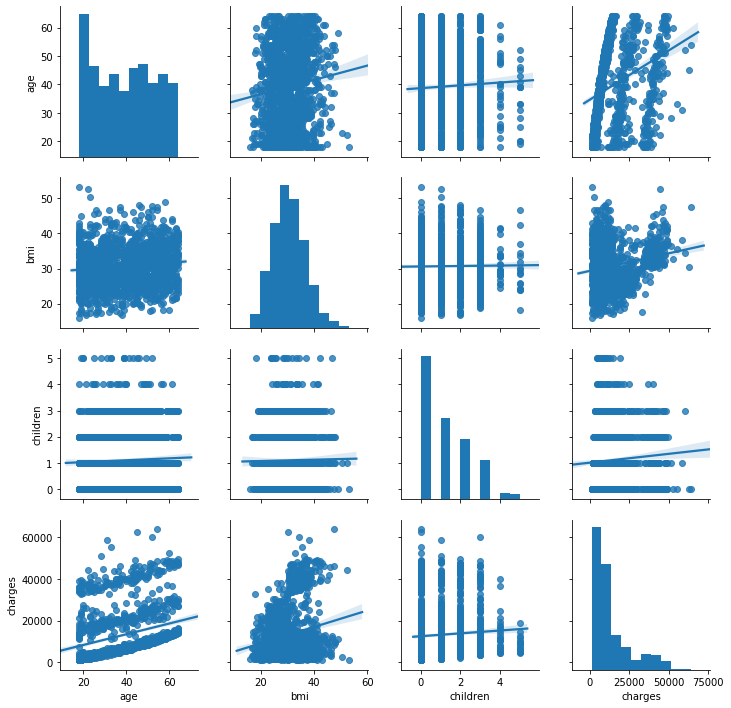

In [ ]:
# plot pair - plot scatter plot for each attributes and histograms along the diaginal
sns.pairplot(ins_df, kind="reg")

### Insights:
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones
- charges might be related to smoker as well. let's investigate

In [ ]:
#percentage of smakerer and non-smoker over total population
ins_df.smoker.value_counts()*100/ins_df.smoker.count()

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

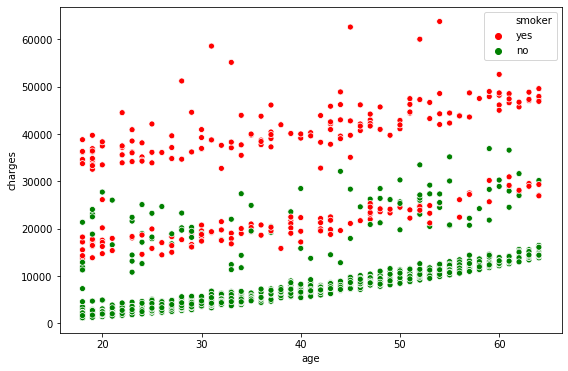

In [ ]:
# Lets check if there is any relation beween smoker age and charges
plt.figure(figsize=(9,6))
sns.scatterplot(ins_df.age, ins_df.charges,hue=ins_df.smoker,palette= ['red','green'])

### Insights:
- The only obvious correlation of 'charges' is with 'smoker'
- Looks like smokers claimed more money than non-smokers
- 20.48 % of the population are smoking,it's quite a good percentage

## 4. Statistical Evidence

### 4.(a). Do charges of people who smoke differ significantly from the people who don't?

### Visually the difference between charges of smokers and charges of non-smokers is apparent but is it statistically true, we want to find out.

### Step 1: State the null and alternative hypothesis:

* $H_0$ = "Charges of smoker and non-smoker are same"      # Stating the Null Hypothesis
* $H_A$ = "Charges of smoker and non-smoker are not same"   # Stating Alternate Hypothesis


### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic

since there two group smoker and non-smoker and they are independent each other. We will use two sample t test for independent



### Step 4: Calculate p value

In [ ]:

smoker = np.array(ins_df[ins_df.smoker == "yes"].charges)  # Selecting charges corresponding to smokers as an array
nonsmoker = np.array(ins_df[ins_df.smoker == "no"].charges) # Selecting charges corresponding to non-smokers as an array

t_statistic, p_value  = stats.ttest_ind(smoker,nonsmoker)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f" With a p_value of {p_value} < 0.05 the charges for smoker and non smoker is not same | we reject the null Hypothesis|")
else:
    print(f" With a p_value of {p_value} > 0.05 the charges for smoker and non smoker is same | we fail to reject the null Hypothesis|")

 With a p_value of 8.271435842177219e-283 < 0.05 the charges for smoker and non smoker is not same | we reject the null Hypothesis|


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 8.271435842177219e-283 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that the charges for smoker and non smoker is same

### 4.(b). Does bmi of males differ significantly from that of females?

In [ ]:
ins_df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Scatter plot age against bmi')

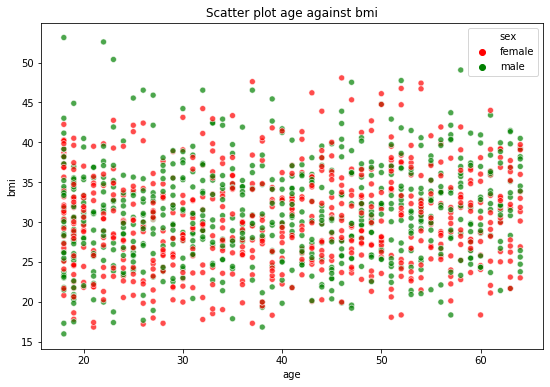

In [ ]:
# Lets check if there is any relation beween smoker age and charges
plt.figure(figsize=(9,6))
sns.scatterplot(ins_df.age, ins_df.bmi,hue=ins_df.sex,palette= ['red','green'],alpha=0.7 )
plt.title("Scatter plot age against bmi")

- Visually, there is no apparent relation between gender and bmi

### Step 1: State the null and alternative hypothesis:

* $H_0$ = "bmi of male and female are same"      # Stating the Null Hypothesis
* $H_A$ = "bmi of male and female are not same"   # Stating Alternate Hypothesis

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic

since there two group male and female bmi and they are independent each other. We will use two sample t test for independent

### Step 4: Calculate p value

In [ ]:
male_bmi=np.array(ins_df[ins_df.sex =="male"].bmi) # Selecting bmi corresponding to smokers as an array
female_bmi=np.array(ins_df[ins_df.sex =="female"].bmi) # Selecting bmi corresponding to non-smokers as an array

t_statistic, p_value  = stats.ttest_ind(male_bmi,female_bmi)  #Performing an Independent t-test

if p_value < 0.05:
    print(f" With a p_value of {round(p_value,4)}  < .05 the difference in bmi of male and female is significant aka |we reject the null|")
else:
    print(f" With a p_value of {round(p_value,4)} > .05 the difference in bmi of male and female is not significant aka |we fail to reject the null|")


 With a p_value of 0.09 > .05 the difference in bmi of male and female is not significant aka |we fail to reject the null|


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is .09 and it is more than our chosen level of signifance at 5%

So the statistical decision is fail to reject the null hypothesis at 5% level of significance.

### So fail to reject as there is  no sufficient evidence to reject the null hypothesis that the male bmi and female bmi are same

### 4.(c). Is the proportion of smokers significantly different in different genders?

* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population


### Step 1: State the null and alternative hypothesis:

* $H_0$ = " The proportions are equal"      # Stating the Null Hypothesis
* $H_A$ = " The two proportions are not equal"   # Stating Alternate Hypothesis

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic

since we are looking for  the proportion of smokers in the female population, we will go for ttest

### Step 4: Calculate p value


In [ ]:
 female_smokers = ins_df[ins_df["sex"]=="female"].smoker.value_counts()[1] # number of female smokers
male_smokers = ins_df[ins_df["sex"]=="male"].smoker.value_counts()[1] # number of male smokers
n_females = ins_df.sex.value_counts()[1] # number of females in the data
n_males = ins_df.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


The proportions are different but are they statistically significant?

In [ ]:
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')


 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [ ]:
stat , pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
if pval < 0.05:
    print(f" with a pval of {round(pval,4)} <0.05 the proportion of male and female smoker are not equal aka |we reject the null|")
else:
    print(f" with a pval of {round(pval,4)} >0.05 the proportion of male and female smoker are equal aka |we fail to reject the null|")

 with a pval of 0.0053 <0.05 the proportion of male and female smoker are not equal aka |we reject the null|


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is .0053 and it is less than our chosen level of signifance at 5%

So the statistical decision to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence to reject the null hypothesis that the male smoker and female smoker are same

###  4.(d). Is the distribution of bmi across women with no children, one child and two children, the same?


### Step 1: State the null and alternative hypothesis:

* $H_0$ = "No. of children has no effect on bmi"      # Stating the Null Hypothesis
* $H_A$ = "No. of children has an effect on bmi"   # Stating Alternate Hypothesis

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic

since we are looking for  the proportion of smokers in the female population, we will go for ttest

### Step 4: Calculate p value

In [ ]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

female_df = ins_df[ins_df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)

if pval < 0.05:
    print(f" with a pval of {round(pval,4)} <0.05 the no. of children has an effect on bmi aka |we reject the null|")
else:
    print(f" with a pval of {round(pval,4)} >0.05 the no. of children has no effect on bmi aka |we fail to reject the null|")

 with a pval of 0.0053 <0.05 the no. of children has an effect on bmi aka |we reject the null|


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is .0053 and it is less than our chosen level of signifance at 5%

So the statistical decision to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence to reject the null hypothesis that the no. of children has an no effect on bmi